<h1>OVERVIEW</h1>
<ul>
    <li>Implement a 2-class classification neural network with a single hidden layer</li>
    <li>Use units with a non-linear activation function, such as tanh</li>
    <li>Compute the cross entropy loss</li>
    <li>Implement forward and backward propagation</li>
<ul/>

In [50]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

<h2>Dataset and Visualize the data</h2>

In [51]:
X, Y = load_planar_dataset()

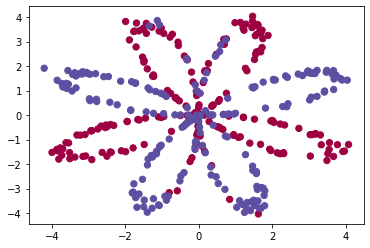

In [52]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [53]:
m_train = X.shape[1]

<h2>Logistic Regression</h2>
<p>we want the classifier to define regions as either red or blue.</p>

In [54]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y[0].T)

LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


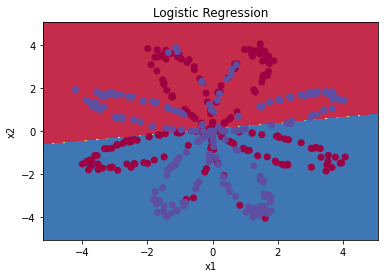

In [55]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

<h2>Neural Network model</h2>
<img src="./img/1.png"/>


<h2> Defining the neural network structure </h2>
<h3> Let's find out:</h3>
<ul>
    <li>n_x: the size of the input layer</li>
    <li>n_h: the size of the hidden layer (set this to 4) </li>
    <li>n_y: the size of the output layer</li>
</ul>

In [56]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4 # Hard code :(, just for now
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

In [57]:
n_x, n_h, n_y = layer_sizes(X, Y)

<h2>Initialize the model's parameters</h2>
<p>For initialization we need to know the shape of the parameters</p>
<p>$W^{[1]} = \begin{bmatrix} -- & w^{[1]}_{1} & -- \\ -- & w^{[1]}_{2} & -- \\ -- & \vdots & -- \\ -- & w^{[1]}_{n_h} & --  \end{bmatrix}_ {n_h * n_x}$
$b^{[1]} = \begin{bmatrix} b^{[1]}_{1} \\ b^{[1]}_{2} \\ \vdots \\ b^{[1]}_{n_h} \end{bmatrix}_{n_h * 1}$
$W^{[2]} = \begin{bmatrix}-- w^{[2]} -- \end{bmatrix}_{n_y = 1 * n_h}$
$b^{[2]} = (n_y, 1)$
</p>


In [58]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    return W1, b1, W2, b2

In [59]:
parameters = initialize_parameters(n_x, n_h, n_y)

<h2>Why do we need Random Initialization and multiply them by a small value?</h2>


<ul>
<li>
<p>In logistic regression it wasn't important to initialize the weights randomly, while in NN we have to initialize them randomly.</p>
</li>
<li>
<p>If we initialize all the weights with zeros in NN it won't work (initializing bias with zero is OK):</p>
<ul>
<li>all hidden units will be completely identical (symmetric) - compute exactly the same function</li>
<li>on each gradient descent iteration all the hidden units will always update the same</li>
</ul>
</li>
<li>
<p>To solve this we initialize the W's with a small random numbers:</p>
<div class="snippet-clipboard-content position-relative"><pre><code>W1 = np.random.randn((2,2)) * 0.01    # 0.01 to make it small enough
b1 = np.zeros((2,1))                  # its ok to have b as zero, it won't get us to the symmetry breaking problem
</code></pre><div class="zeroclipboard-container position-absolute right-0 top-0">
    <clipboard-copy aria-label="Copy" class="ClipboardButton btn js-clipboard-copy m-2 p-0 tooltipped-no-delay" data-copy-feedback="Copied!" data-tooltip-direction="w" value="W1 = np.random.randn((2,2)) * 0.01    # 0.01 to make it small enough
b1 = np.zeros((2,1))                  # its ok to have b as zero, it won't get us to the symmetry breaking problem
" tabindex="0" role="button">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-paste js-clipboard-clippy-icon m-2">
    <path fill-rule="evenodd" d="M5.75 1a.75.75 0 00-.75.75v3c0 .414.336.75.75.75h4.5a.75.75 0 00.75-.75v-3a.75.75 0 00-.75-.75h-4.5zm.75 3V2.5h3V4h-3zm-2.874-.467a.75.75 0 00-.752-1.298A1.75 1.75 0 002 3.75v9.5c0 .966.784 1.75 1.75 1.75h8.5A1.75 1.75 0 0014 13.25v-9.5a1.75 1.75 0 00-.874-1.515.75.75 0 10-.752 1.298.25.25 0 01.126.217v9.5a.25.25 0 01-.25.25h-8.5a.25.25 0 01-.25-.25v-9.5a.25.25 0 01.126-.217z"></path>
</svg>
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check js-clipboard-check-icon color-text-success d-none m-2">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    </clipboard-copy>
  </div></div>
</li>
<li>
<p>We need small values because in sigmoid (or tanh), for example, if the weight is too large you are more likely to end up even at the very start of training with very large values of Z. Which causes your tanh or your sigmoid activation function to be saturated, thus slowing down learning. If you don't have any sigmoid or tanh activation functions throughout your neural network, this is less of an issue.</p>
</li>
<li>
<p>Constant 0.01 is alright for 1 hidden layer networks, but if the NN is deep this number can be changed but it will always be a small number.</p>
</li>
</ul>

<h2>Forward propagation</h2>
<h3>Mathematically:</h3>
<p>Given X, where :</p>
<p>$X = \begin{bmatrix} \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots \\ x^{(1)} & x^{(2)}& \dots & x^{(m)} \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots \end{bmatrix}_ {n_x * m}$</p>
<p><b>Want: </b></p>
<p>$Z^{[1]} = W^{[1]}.X + b^{[1]}$</p>
<p>$A^{[1]} = g^{[1]}(Z^{[1]}) = tanh(Z^{[1]})$</p>
<p>$Z^{[2]} = W^{[1]}.A^{[1]} + b^{[2]}$</p>
<p>$A^{[2]} = g^{[2]}(Z^{[2]}) = \sigma(Z^{[1]})$</p>
<p>$Z^{[1]} = \begin{bmatrix} \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots \\ z^{[1](1)} & z^{[1](2)}& \dots & z^{[1](m)} \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots \end{bmatrix}_ {n_h * m}$ 
$Z^{[2]} = \begin{bmatrix}-- Z^{[2]} -- \end{bmatrix}_{n_y = 1 * n_m}$
</p>

In [60]:
def forward_propagtaion(X, parameters):
    W1 = parameters[0]
    b1 = parameters[1]
    W2 = parameters[2]
    b2 = parameters[3]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2

<h2>Compute Cost</h2>
<p>$$ J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small $$</p>

In [61]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = -1/m*np.sum(logprobs)
    return float(np.squeeze(cost)) # makes sure cost is the dimension we expect. E.g., turns [[1]] into 1  

<h2>Backward propagation</h2>
<img src="img/grad_summary.png"/>
<p>To compute dZ1 we'll need to compute <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>g</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><msup><mo stretchy=&quot;false&quot;>]</mo><mo>&amp;#x2032;</mo></msup></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><msup><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></mrow></msup><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-504" style="width: 4.586em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.812em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1003.75em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-505"><span class="msubsup" id="MathJax-Span-506"><span style="display: inline-block; position: relative; width: 1.61em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-507" style="font-family: STIXGeneral-Italic;">g</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="texatom" id="MathJax-Span-508"><span class="mrow" id="MathJax-Span-509"><span class="mo" id="MathJax-Span-510" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-511" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="msup" id="MathJax-Span-512"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.18em, 4.289em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-513" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.283em; left: 0.241em;"><span class="mo" id="MathJax-Span-514" style="font-size: 50%; font-family: STIXVariants;">′</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-515" style="font-family: STIXGeneral-Regular;">(</span><span class="msubsup" id="MathJax-Span-516"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.6em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-517" style="font-family: STIXGeneral-Italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-518"><span class="mrow" id="MathJax-Span-519"><span class="mo" id="MathJax-Span-520" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-521" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mo" id="MathJax-Span-522" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-523" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.504em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>g</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><msup><mo stretchy="false">]</mo><mo>′</mo></msup></mrow></msup><mo stretchy="false">(</mo><msup><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><mo stretchy="false">]</mo></mrow></msup><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-16">g^{[1]'}(Z^{[1]})</script>. Since <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>g</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><mo>.</mo><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-524" style="width: 3.039em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.503em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1002.44em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-525"><span class="msubsup" id="MathJax-Span-526"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-527" style="font-family: STIXGeneral-Italic;">g</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="texatom" id="MathJax-Span-528"><span class="mrow" id="MathJax-Span-529"><span class="mo" id="MathJax-Span-530" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-531" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mo" id="MathJax-Span-532" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-533" style="font-family: STIXGeneral-Regular;">(</span><span class="mo" id="MathJax-Span-534" style="font-family: STIXGeneral-Regular;">.</span><span class="mo" id="MathJax-Span-535" style="font-family: STIXGeneral-Regular; padding-left: 0.182em;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>g</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><mo stretchy="false">]</mo></mrow></msup><mo stretchy="false">(</mo><mo>.</mo><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-17">g^{[1]}(.)</script> is the tanh activation function, if <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>a</mi><mo>=</mo><msup><mi>g</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-536" style="width: 5.182em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.289em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1004.23em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-537"><span class="mi" id="MathJax-Span-538" style="font-family: STIXGeneral-Italic;">a</span><span class="mo" id="MathJax-Span-539" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="msubsup" id="MathJax-Span-540" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 1.432em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-541" style="font-family: STIXGeneral-Italic;">g</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="texatom" id="MathJax-Span-542"><span class="mrow" id="MathJax-Span-543"><span class="mo" id="MathJax-Span-544" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-545" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mo" id="MathJax-Span-546" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-547" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-548" style="font-family: STIXGeneral-Italic;">z</span><span class="mo" id="MathJax-Span-549" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>a</mi><mo>=</mo><msup><mi>g</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><mo stretchy="false">]</mo></mrow></msup><mo stretchy="false">(</mo><mi>z</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-18">a = g^{[1]}(z)</script> then <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>g</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><msup><mo stretchy=&quot;false&quot;>]</mo><mo>&amp;#x2032;</mo></msup></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mn>1</mn><mo>&amp;#x2212;</mo><msup><mi>a</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-550" style="width: 7.86em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.551em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1006.55em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-551"><span class="msubsup" id="MathJax-Span-552"><span style="display: inline-block; position: relative; width: 1.61em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-553" style="font-family: STIXGeneral-Italic;">g</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="texatom" id="MathJax-Span-554"><span class="mrow" id="MathJax-Span-555"><span class="mo" id="MathJax-Span-556" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-557" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="msup" id="MathJax-Span-558"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.18em, 4.289em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-559" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.283em; left: 0.241em;"><span class="mo" id="MathJax-Span-560" style="font-size: 50%; font-family: STIXVariants;">′</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-561" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-562" style="font-family: STIXGeneral-Italic;">z</span><span class="mo" id="MathJax-Span-563" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-564" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-565" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">1</span><span class="mo" id="MathJax-Span-566" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">−</span><span class="msubsup" id="MathJax-Span-567" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 0.955em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-568" style="font-family: STIXGeneral-Italic;">a</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="mn" id="MathJax-Span-569" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">2</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.504em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>g</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><msup><mo stretchy="false">]</mo><mo>′</mo></msup></mrow></msup><mo stretchy="false">(</mo><mi>z</mi><mo stretchy="false">)</mo><mo>=</mo><mn>1</mn><mo>−</mo><msup><mi>a</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-19">g^{[1]'}(z) = 1-a^2</script>. So we can compute 
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-20-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>g</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><msup><mo stretchy=&quot;false&quot;>]</mo><mo>&amp;#x2032;</mo></msup></mrow></msup><mo stretchy=&quot;false&quot;>(</mo><msup><mi>Z</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></mrow></msup><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-570" style="width: 4.586em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.812em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.491em, 1003.75em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-571"><span class="msubsup" id="MathJax-Span-572"><span style="display: inline-block; position: relative; width: 1.61em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-573" style="font-family: STIXGeneral-Italic;">g</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.479em;"><span class="texatom" id="MathJax-Span-574"><span class="mrow" id="MathJax-Span-575"><span class="mo" id="MathJax-Span-576" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-577" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="msup" id="MathJax-Span-578"><span style="display: inline-block; position: relative; width: 0.479em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.18em, 4.289em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-579" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.283em; left: 0.241em;"><span class="mo" id="MathJax-Span-580" style="font-size: 50%; font-family: STIXVariants;">′</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-581" style="font-family: STIXGeneral-Regular;">(</span><span class="msubsup" id="MathJax-Span-582"><span style="display: inline-block; position: relative; width: 1.551em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.6em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-583" style="font-family: STIXGeneral-Italic;">Z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.658em;"><span class="texatom" id="MathJax-Span-584"><span class="mrow" id="MathJax-Span-585"><span class="mo" id="MathJax-Span-586" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">[</span><span class="mn" id="MathJax-Span-587" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mo" id="MathJax-Span-588" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-589" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.504em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>g</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><msup><mo stretchy="false">]</mo><mo>′</mo></msup></mrow></msup><mo stretchy="false">(</mo><msup><mi>Z</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">[</mo><mn>1</mn><mo stretchy="false">]</mo></mrow></msup><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-20">g^{[1]'}(Z^{[1]})</script> using <code>(1 - np.power(A1, 2))</code>.</p>

In [102]:
def backward_propagation(X, Y, parameters, Z1, A1, Z2, A2):
    m = X.shape[1]
    W1, b1, W2, b2  = parameters
    # for layer 2
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    # for layer 1
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    return dW2, db2, dW1,db1

In [103]:
Z1, A1, Z2, A2 = forward_propagtaion(X, parameters)
backward_propagation(X, Y, parameters, Z1, A1, Z2, A2)

(array([[ 1.76246381e-07,  1.76122653e-07,  1.76662123e-07,
         -7.05766204e-07]]),
 array([[-1.76660979e-07]]),
 array([[-1.84716687e-11,  1.28008372e-10],
        [-5.84063818e-10,  1.78788608e-09],
        [-2.00461529e-13, -1.70545980e-12],
        [-5.43875184e-08,  3.73804049e-07]]),
 array([[-3.54158954e-11],
        [-4.89387535e-10],
        [-4.24070503e-13],
        [-1.03556830e-07]]))

<h2>Gradient descent </h2>
<p>$\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where α is the learning rate and θ represents a parameter.</p>

In [104]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate = 1.2):
    W2 = W2 - (learning_rate) * dW2
    b2 = b2 - (learning_rate) * db2
    W1 = W1 - (learning_rate) * dW1
    b1 = b1 - (learning_rate) * db1
    
    return W1, b1, W2, b2

<h2>Neural network model</h2>

In [105]:
def nn_model(X, Y, n_h, iteration_num = 10000, print_cost=False):
    np.random.seed(3)
    n_x, dummy, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y) # W1, b1, W2, b2
    for i in range(iteration_num):
        # 1) Forward propagation => OUTPUT: Z1, A1, Z2, A2
        Z1, A1, Z2, A2 = forward_propagtaion(X, parameters)
        # 2) Backward propagation => OUTPUT: dW2, db2, dW1, db1
        dW2, db2, dW1, db1 = backward_propagation(X, Y, parameters, Z1, A1, Z2, A2)
        # 3) Gradient descent => OUTPUT: W1, b1, W2, b2
        parameters = update_parameters(parameters[0], parameters[1], parameters[2], parameters[3], dW1, db1, dW2, db2)
        # Comput Cost
        if print_cost:
            cost = compute_cost(A2, Y)
            print(f'cost after iterattion {i + 1} : {cost}')
    
    return parameters

In [106]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, iteration_num=10000)

<h2>Predict</h2>

In [107]:
def predict(parameters, X):
    Z1, A1, Z2, A2 = forward_propagtaion(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [108]:
dummy, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

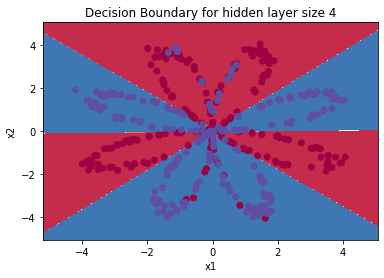

In [112]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, iteration_num = 10000, print_cost=False)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.5 %


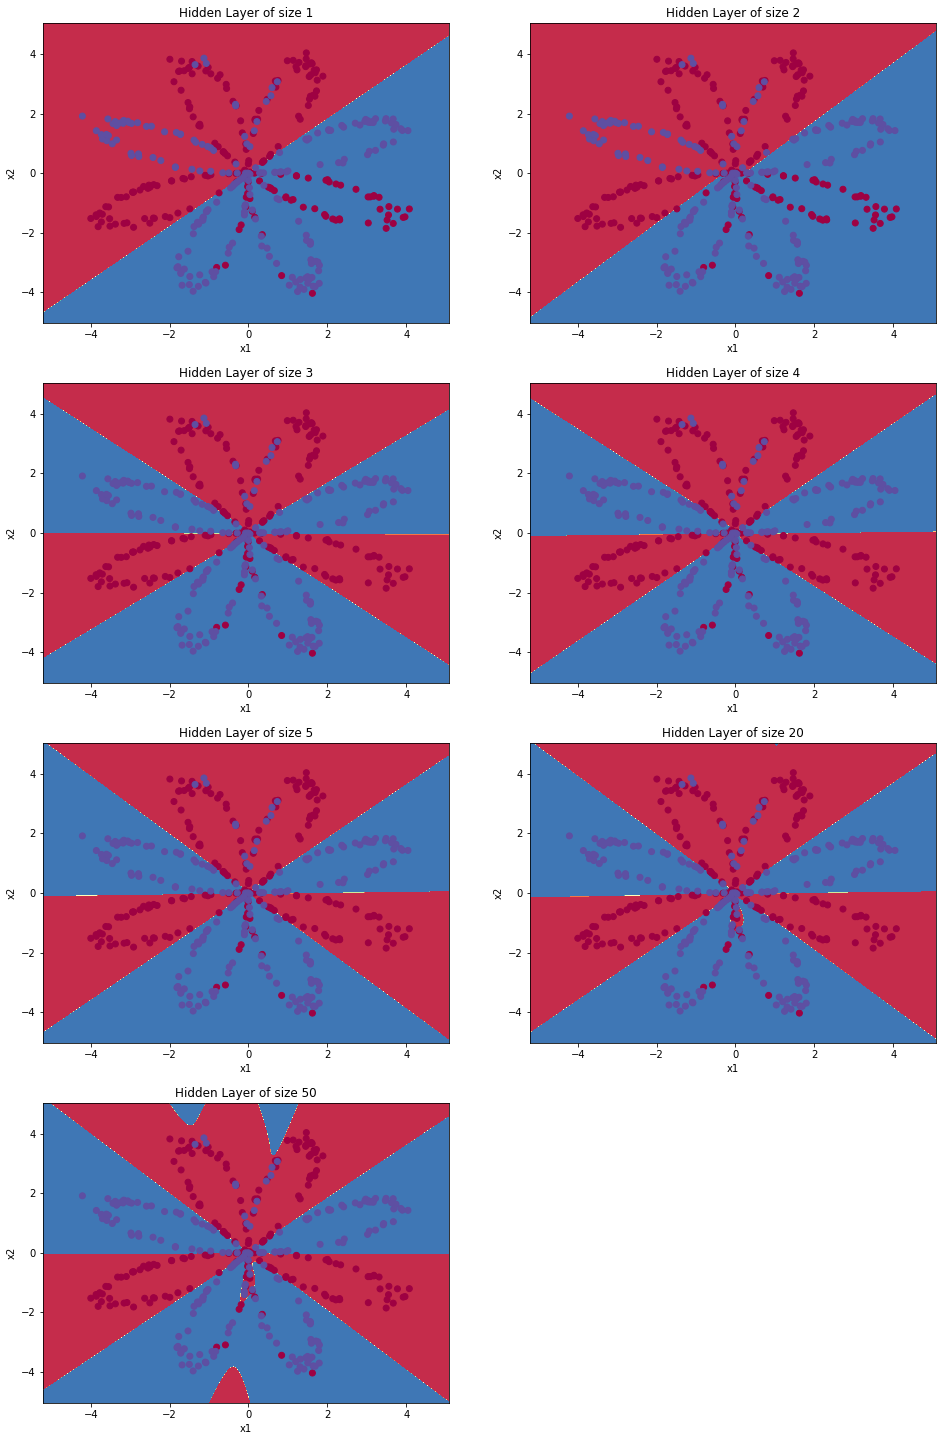

In [111]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, iteration_num = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))